# 5대범죄 관할구별 발생 시각화

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# 한글깨짐 해결
import os
os.name

if os.name == 'posix': 
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': 
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) 

%config InlineBackend.figure_format = 'retina'

In [6]:
#부산시 구별 5대 범죄 발생 검거 현황 
# 출처: 공공데이터 부산시 5대 범죄 발생 현황

crime18 = pd.read_csv('./Busan_Crime/18_BusanCrime.csv',encoding = 'utf-8')
crime19 = pd.read_csv('./Busan_Crime/19_BusanCrime.csv',encoding = 'utf-8')
crime20 = pd.read_csv('./Busan_Crime/20_BusanCrime.csv',encoding = 'utf-8')
crime21 = pd.read_csv('./Busan_Crime/21_BusanCrime.csv',encoding = 'utf-8')
crime18.head()


,연번,경찰서,구분,살인,강도,성범죄,절도,폭력
0,1,중부,경찰서,1,2,47,954,784
1,2,동래,경찰서,3,6,89,1078,1375
2,3,영도,경찰서,4,2,43,329,666
3,4,동부,경찰서,0,5,63,576,823
4,5,부산진,경찰서,1,17,321,2376,3253


In [7]:
crime18.head()


,연번,경찰서,구분,살인,강도,성범죄,절도,폭력
0,1,중부,경찰서,1,2,47,954,784
1,2,동래,경찰서,3,6,89,1078,1375
2,3,영도,경찰서,4,2,43,329,666
3,4,동부,경찰서,0,5,63,576,823
4,5,부산진,경찰서,1,17,321,2376,3253


In [8]:
crime19.head()


,연번,경찰서,구분,살인,강도,성범죄,절도,폭력
0,1,중부,경찰서,3,4,64,700,822
1,2,동래,경찰서,4,6,91,938,1468
2,3,영도,경찰서,4,5,32,350,662
3,4,동부,경찰서,0,10,52,696,934
4,5,부산진,경찰서,7,16,306,2424,3304


In [9]:
# crime18.columns=['관할구','구분','살인','강도','성범죄','절도','폭력']
# crime19.columns=['관할구','구분','살인','강도','성범죄','절도','폭력']
# crime20.columns=['관할구','구분','살인','강도','성범죄','절도','폭력']
# crime21.columns=['관할구','구분','살인','강도','성범죄','절도','폭력']



In [10]:
# 합계 column 추가하기
crime18['합계']=crime18['살인']+crime18['강도']+crime18['성범죄']+crime18['절도']+crime18['폭력']
crime19['합계']=crime19['살인']+crime19['강도']+crime19['성범죄']+crime19['절도']+crime19['폭력']
crime20['합계']=crime20['살인']+crime20['강도']+crime20['성범죄']+crime20['절도']+crime20['폭력']
crime21['합계']=crime21['살인']+crime21['강도']+crime21['성범죄']+crime21['절도']+crime21['폭력']


In [11]:
crime18.columns

Index(['연번', '경찰서', '구분', '살인', '강도', '성범죄', '절도', '폭력', '합계'], dtype='object')

In [12]:
crime_sum = crime18['합계'] + crime19['합계'] + crime20['합계'] + crime21['합계']

In [13]:
crime_sum

0      5937
1      9657
2      3970
3      5756
4     22869
5      4440
6     14155
7     13286
8      9660
9      7611
10    10402
11    10790
12     4021
13     9466
14     5106
Name: 합계, dtype: int64

In [14]:
crime_sum = pd.DataFrame(crime_sum)
crime_sum

,합계
0,5937
1,9657
2,3970
3,5756
4,22869
5,4440
6,14155
7,13286
8,9660
9,7611


In [15]:

df18=pd.DataFrame(crime18)
df19=pd.DataFrame(crime19)
df20=pd.DataFrame(crime20)
df21=pd.DataFrame(crime21)

In [16]:
# 4개년 (2018~2021년) 부산 5대범죄 막대그래프로 비교

# crime_sort = crime_sum.sort_values('합계', ascending=False)
# crime_sort.plot.bar(figsize=(15,10))

In [17]:
result =pd.concat([df18,df19,df20,df21],ignore_index=True)

In [18]:
result

,연번,경찰서,구분,살인,강도,성범죄,절도,폭력,합계
0,1,중부,경찰서,1,2,47,954,784,1788
1,2,동래,경찰서,3,6,89,1078,1375,2551
2,3,영도,경찰서,4,2,43,329,666,1044
3,4,동부,경찰서,0,5,63,576,823,1467
4,5,부산진,경찰서,1,17,321,2376,3253,5968
5,6,서부,경찰서,3,8,32,730,282,1055
6,7,남부,경찰서,8,10,185,1458,2091,3752
7,8,해운대,경찰서,3,3,185,1376,1986,3553
8,9,사상,경찰서,5,9,116,1018,1312,2460
9,10,금정,경찰서,4,7,87,595,936,1629


In [19]:
# seoul_crime['관할구'] = districts #경찰서 별 관할구 추가
# by_district = seoul_crime.groupby('관할구') #경찰서 별에서 관할구 별 범죄발생 테이블로 변경
# district_crime = by_district.sum()
# district_crime.head()


crime= result.groupby('경찰서')
crime_sum = crime.sum()

crime_sum

,연번,살인,강도,성범죄,절도,폭력,합계
경찰서,,,,,,,
강서,52,6,7,156,1774,2078,4021
금정,40,21,22,320,3352,3896,7611
기장,60,5,4,178,1993,2926,5106
남부,28,27,25,646,5538,7919,14155
동래,8,14,15,380,3956,5292,9657
동부,16,4,15,194,2321,3222,5756
부산진,20,13,47,1178,9294,12337,22869
북부,56,18,17,317,3568,5546,9466
사상,36,24,25,404,3959,5248,9660


In [20]:

# 범죄별 빈도가 다르기 때문에 0~1의 범위로 놓고 비교 각 항목의 최댓값은 1 최소값은 0
col = ['살인','강도','성범죄','절도','폭력']
x = crime_sum[col].values
scaler = preprocessing.MinMaxScaler()
x_scaled =  scaler.fit_transform(x.astype(float))
crime_norm = pd.DataFrame(x_scaled, columns = col, index = crime_sum.index)
crime_norm

,살인,강도,성범죄,절도,폭력
경찰서,,,,,
강서,0.086957,0.069767,0.027593,0.054088,0.000000
금정,0.739130,0.418605,0.183635,0.252579,0.177210
기장,0.043478,0.000000,0.048525,0.081635,0.082659
남부,1.000000,0.488372,0.493815,0.527547,0.569354
동래,0.434783,0.255814,0.240723,0.328553,0.313286
동부,0.000000,0.255814,0.063749,0.122893,0.111512
부산진,0.391304,1.000000,1.000000,1.000000,1.000000
북부,0.608696,0.302326,0.180780,0.279748,0.338045
사상,0.869565,0.488372,0.263559,0.328931,0.308997


<AxesSubplot:xlabel='경찰서'>

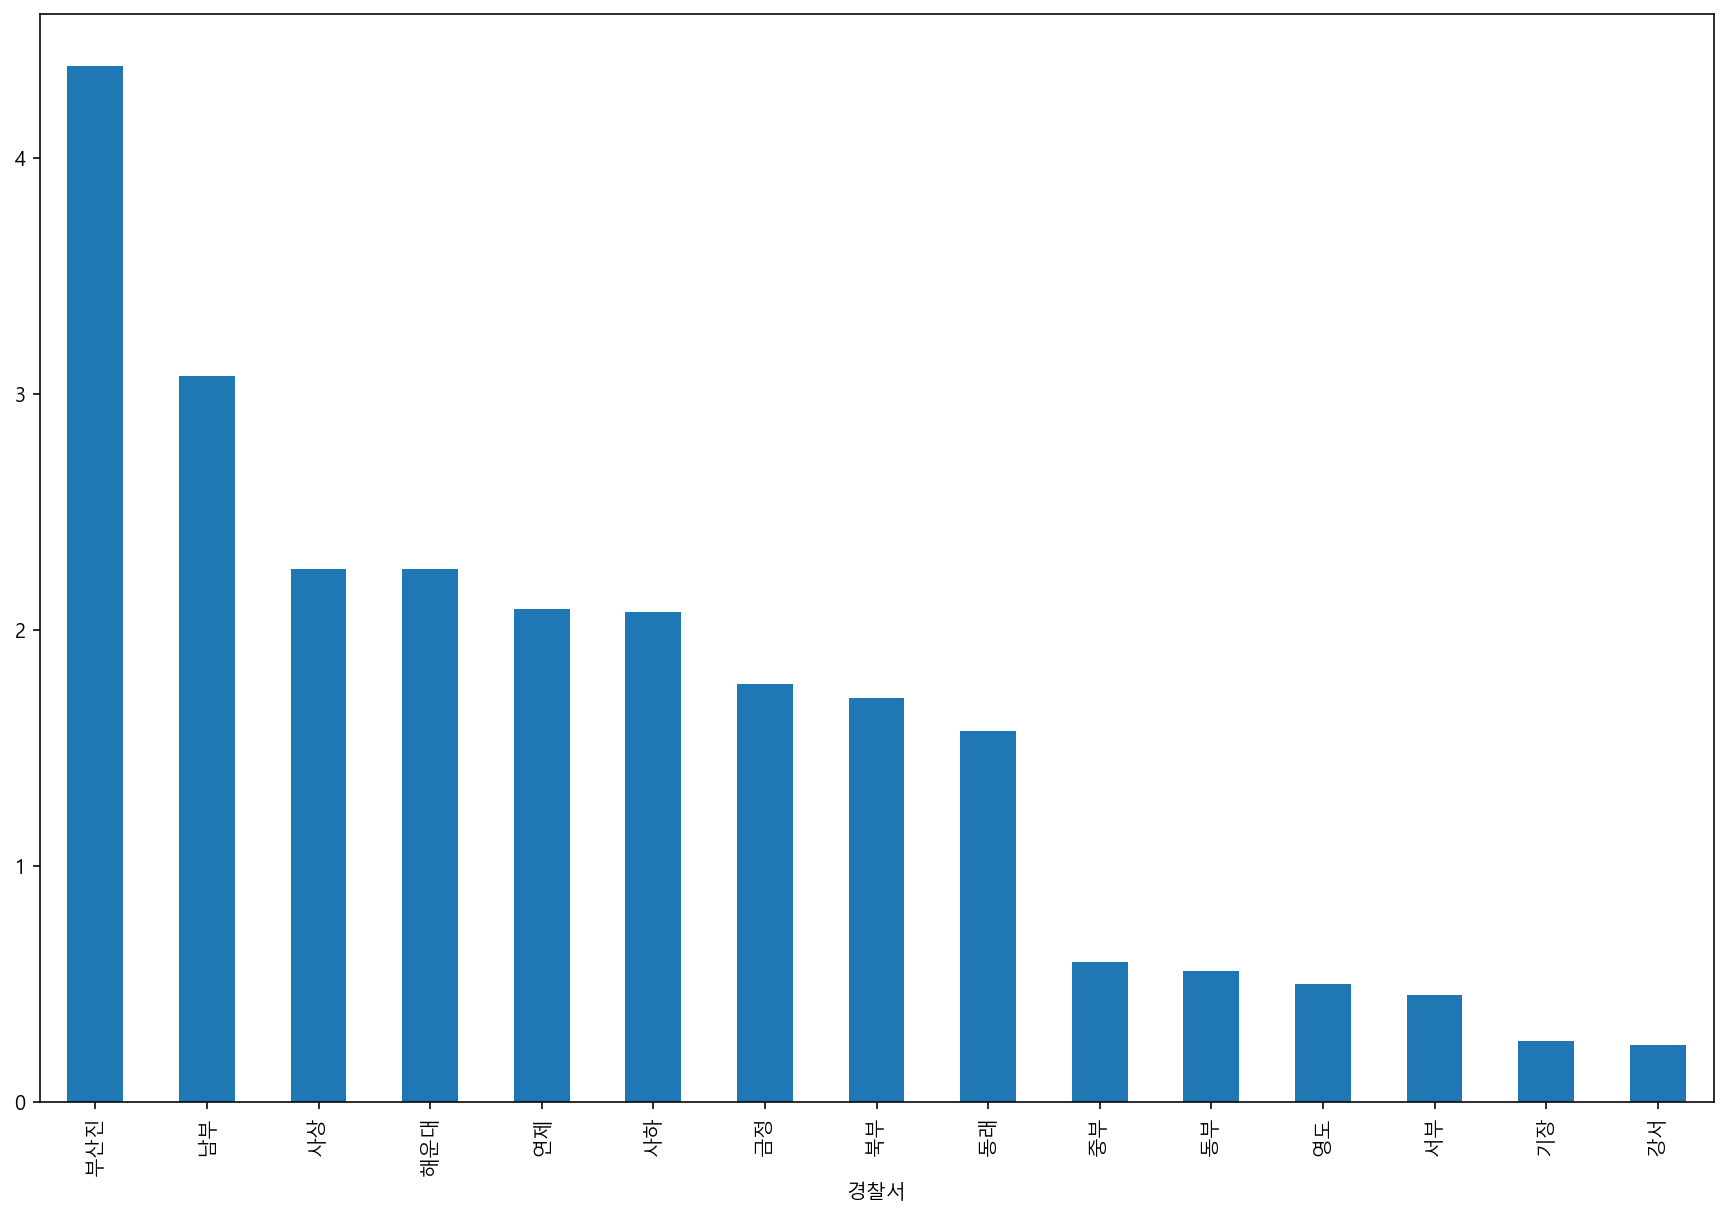

In [21]:

# 4개년 (2018~2021년) 부산 5대범죄 막대그래프로 비교

#5대범죄 막대그래프로 비교
crime_norm['5대범죄'] = np.sum(crime_norm[col],axis=1) 
crime_sort = crime_norm.sort_values('5대범죄', ascending=False)
crime_sort = crime_sort.iloc[:,5]
crime_sort.plot.bar(figsize=(15,10))



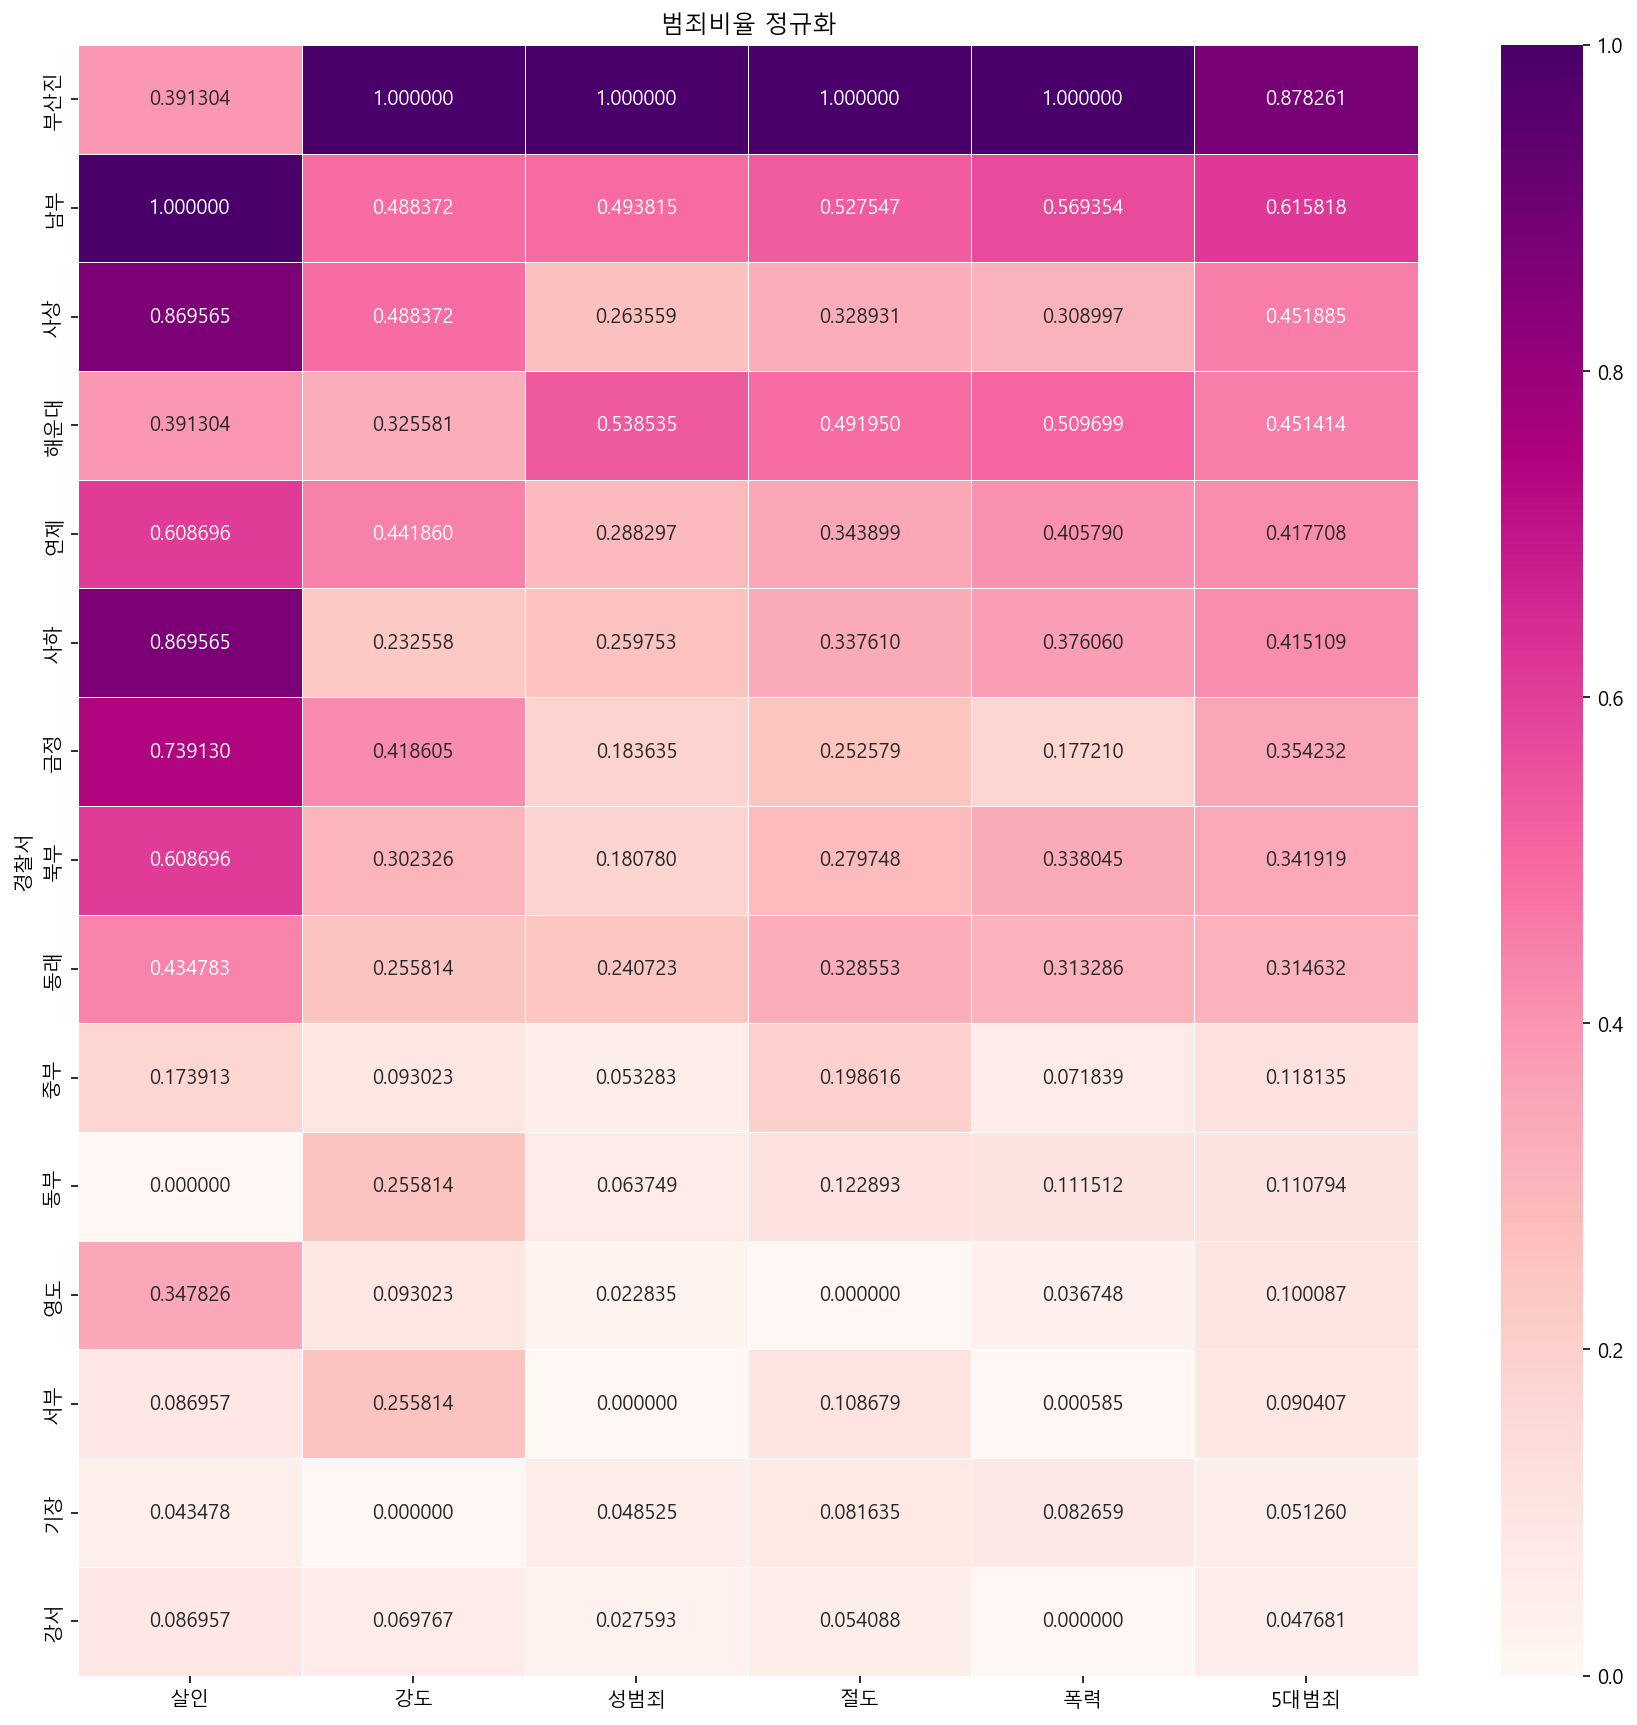

In [22]:
crime_norm['5대범죄'] = np.sum(crime_norm[col],axis=1) / 5
col.append('5대범죄')
crime_norm_sort = crime_norm.sort_values(by='5대범죄', ascending=False)
plt.figure(figsize=(15,15))

sns.heatmap(crime_norm_sort[col], annot=True, fmt='f', linewidth=.5 , cmap='RdPu')
plt.title('범죄비율 정규화')
plt.show()

In [23]:
# 년도별 5대 범죄 꺾은선 그래프

# 년도별 5대 범죄 dataFrame 생성
# crime_sum = pd.DataFrame(crime_sum)

# x축 index('2018','2019','2020','2021')


In [24]:
# 살인(mur)	 강도(rob)	성범죄(sex)	절도(gra)	폭력(vio)



In [25]:

# df18=pd.DataFrame(crime18)
# df19=pd.DataFrame(crime19)
# df20=pd.DataFrame(crime20)
# df21=pd.DataFrame(crime21)

In [27]:

sum18_mur = np.sum(crime18['살인'])
sum18_rob = np.sum(crime18['강도'])
sum18_sex = np.sum(crime18['성범죄'])
sum18_gra = np.sum(crime18['절도'])
sum18_vio = np.sum(crime18['폭력'])



sum19_mur = np.sum(crime19['살인'])
sum19_rob = np.sum(crime19['강도'])
sum19_sex = np.sum(crime19['성범죄'])
sum19_gra = np.sum(crime18['절도'])
sum19_vio = np.sum(crime18['폭력'])



sum20_mur = np.sum(crime20['살인'])
sum20_rob = np.sum(crime20['강도'])
sum20_sex = np.sum(crime20['성범죄'])
sum20_gra = np.sum(crime18['절도'])
sum20_vio = np.sum(crime18['폭력'])




sum21_mur = np.sum(crime21['살인'])
sum21_rob = np.sum(crime21['강도'])
sum21_sex = np.sum(crime21['성범죄'])
sum21_gra = np.sum(crime18['절도'])
sum21_vio = np.sum(crime18['폭력'])




In [28]:
df1= pd.DataFrame({'강도': [sum18_mur],
                    '살인': [sum18_rob],
                    '성범죄' : [sum18_sex],
                    '절도' : [sum18_gra], 
                    '폭력' : [sum18_vio],
                    })



In [29]:
df1


,강도,살인,성범죄,절도,폭력
0,53,91,1533,14261,19503


In [38]:
df2= pd.DataFrame({'강도': [sum19_mur],
                    '살인': [sum19_rob],
                    '성범죄' : [sum19_sex],
                    '절도' : [sum19_gra], 
                    '폭력' : [sum19_vio],
                    })

In [39]:
df3= pd.DataFrame({'강도': [sum20_mur],
                    '살인': [sum20_rob],
                    '성범죄' : [sum20_sex],
                    '절도' : [sum20_gra], 
                    '폭력' : [sum20_vio],
                    })

In [40]:
df4= pd.DataFrame({'강도': [sum21_mur],
                    '살인': [sum21_rob],
                    '성범죄' : [sum21_sex],
                    '절도' : [sum21_gra], 
                    '폭력' : [sum21_vio],
                    })

In [41]:
result2 =pd.concat([df1,df2,df3,df4],ignore_index=True)

In [42]:
result2

,강도,살인,성범죄,절도,폭력
0,53,91,1533,14261,19503
1,63,82,1470,14261,19503
2,51,39,1416,14261,19503
3,46,51,1338,14261,19503


In [50]:
# 연도 컬럼 추가
result2['연도'] = ['2018','2019','2020','2021']

,강도,살인,성범죄,절도,폭력,연도
0,53,91,1533,14261,19503,2018
1,63,82,1470,14261,19503,2019
2,51,39,1416,14261,19503,2020
3,46,51,1338,14261,19503,2021
